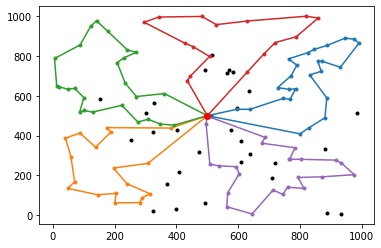

In [32]:
import matplotlib.pyplot as plt

# solution we want to evaluate
sol = open('routes.sol', 'r').read()
# vrp the solution is from
vrp = open('../data/Vrp-Set-X/X/X-n139-k10.vrp', 'r').read()

vrp = vrp.split("\n")
locs = []
i = 0
while i < len(vrp):
    if vrp[i][:18] == "NODE_COORD_SECTION":
        i += 1
        while vrp[i][:14] != "DEMAND_SECTION":
            parts = vrp[i].split()
            locs.append((float(parts[1]), float(parts[2])))
            i += 1
        break
    i += 1

sol = sol.split("\n")[:-1]
t_routes = []
d_routes = []

depot = locs[0]

for route in sol:
    parts = route.split()
    r = []
    for j in range(3, len(parts)):
        r.append(locs[int(parts[j])])

    if parts[0] == "Drone":
        d_routes.append(r)
    else:
        t_routes.append([depot] + r + [depot])

for i in range(len(t_routes)):
    plt.plot(*zip(*t_routes[i]), marker=".", zorder=1)
for i in range(len(d_routes)):
    plt.scatter(*zip(*d_routes[i]), color="black", marker=".", zorder=1)
    #plt.plot(*zip(*d_routes[i]), marker=".", zorder=1)
plt.scatter(*zip(*[depot]), color="red", marker="o", zorder=2)
plt.show()


In [35]:
import math

def eucl(route):
    dist = 0
    for i in range(len(route)-1):
        x1, y1 = route[i]
        x2, y2 = route[i+1]
        dist += math.sqrt((x1-x2)**2 + (y1-y2)**2)
    return dist

def drone_dist(route, speed=2):
    dist = 0
    for l in route:
        x1, y1 = depot
        x2, y2 = l
        dist += 2 * math.sqrt((x1-x2)**2 + (y1-y2)**2) / speed
    return dist

makespan = 0
for route in t_routes:
    dist = eucl(route)
    print("Truck:", dist)
    if dist > makespan:
        makespan = dist

for route in d_routes:
    dist = drone_dist(route)
    print("Drone:", dist)
    if dist > makespan:
        makespan = dist

print("Total makespan:", makespan)


Truck: 1807.1541752917874
Truck: 1808.3940726623625
Truck: 1804.8199787035953
Truck: 1811.8179568165126
Truck: 1808.33898112536
Drone: 1692.4242786514722
Drone: 1780.4899761796148
Drone: 1762.0408277823465
Drone: 1749.7732216041904
Drone: 1807.8423640127794
Total makespan: 1811.8179568165126


In [34]:
# get locations statistics
tot = 0
veh = 0
dr = 0
route_index = 1
for route in t_routes:
    veh += len(route)-2
    tot += len(route)-2
    print(f"Truck Route #{route_index}:", len(route))
    route_index += 1
for route in d_routes:
    dr += len(route)
    tot += len(route)
    print(f"Drone Route #{route_index}:", len(route))
    route_index += 1
print("total deliveries:", tot)
print("total drone deliveries:", dr)
print("total truck deliveries:", veh)
print("drone delivery percent:", dr/tot)


Truck Route #1: 27
Truck Route #2: 20
Truck Route #3: 27
Truck Route #4: 18
Truck Route #5: 26
Drone Route #6: 6
Drone Route #7: 6
Drone Route #8: 6
Drone Route #9: 6
Drone Route #10: 6
total deliveries: 138
total drone deliveries: 30
total truck deliveries: 108
drone delivery percent: 0.21739130434782608


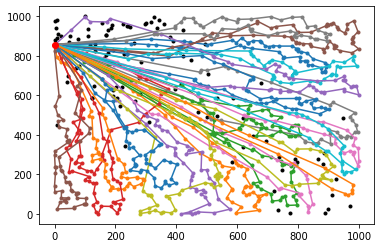

In [22]:
# evaluation of old output format

text = open('routes.txt', 'r').read()

arr = text.split("\n")[:-1]
routes = []
free_locations = None
depot = eval(arr[1])
arr = arr[2:]
for i in range(1,len(arr)):
    if i == 0:
        continue
    if arr[i] == "free locations:":
        free_locations = []
        continue
    
    if free_locations == None:
        routes += [eval(arr[i])]
    else:
        if arr[i]:
            free_locations = [x for x in eval(arr[i])]

routes = [[depot] + r + [depot] for r in routes]

import matplotlib.pyplot as plt

for i in range(len(routes)):
    if i < 100:
        plt.plot(*zip(*routes[i]), marker=".", zorder=1)
if free_locations:
    plt.scatter(*zip(*free_locations), color="black", marker=".", zorder=1)
plt.scatter(*zip(*[depot]), color="red", marker="o", zorder=2)
plt.show()

In [20]:
# makespan of old output format

#amount of drones to use
drone_amount = 25

import math
# get fitness
def manhatten(route):
    dist = 0
    for i in range(len(route)-1):
        x1, y1 = route[i]
        x2, y2 = route[i+1]
        dist += abs(x1-x2) + abs(y1-y2)
    return dist

def eucl(route):
    dist = 0
    for i in range(len(route)-1):
        x1, y1 = route[i]
        x2, y2 = route[i+1]
        dist += math.sqrt((x1-x2)**2 + (y1-y2)**2)
    return dist

def drone_dist(fls, depot, drones, speed=2):
    dists = []
    for fl in fls:
        x,y = fl
        xd, yd = depot
        dists.append(2 * math.sqrt((x-xd)**2 + (y-yd)**2))

    dists.sort()

    ds = [0] * drones

    for d in dists[::-1]:
        sm = 0
        for i in range(drones):
            if ds[sm] > ds[i]:
                sm = i
        ds[sm] += d/speed
    return ds

makespan = 0
for route in routes:
    dist = eucl(route)
    print(dist)
    if dist > makespan:
        makespan = dist
ds = drone_dist(free_locations, depot, drone_amount)

for dist in ds:
    print(dist)
    if dist > makespan:
        makespan = dist

makespan


NameError: name 'routes' is not defined

In [5]:
# old animation code
def plot_routes(file, save=None):
    text = open(file, 'r').read()
    arr = text.split("\n")[:-1]
    routes = []
    free_locations = None
    depot = eval(arr[1])
    arr = arr[2:]
    for i in range(1,len(arr)):
        if i == 0:
            continue
        if arr[i] == "free locations:":
            free_locations = []
            continue
        
        if free_locations == None:
            routes += [eval(arr[i])]
        else:
            if arr[i]:
                free_locations = [x for x in eval(arr[i])]
    routes = [[depot] + r + [depot] for r in routes]
    for i in range(len(routes)):
        plt.plot(*zip(*routes[i]), marker="o", zorder=1)
    if free_locations:
        plt.scatter(*zip(*free_locations), color="black", marker="o", zorder=1)
    plt.scatter(*zip(*[depot]), color="red", marker="o", zorder=2)
    if save != None:
        plt.savefig(save)
    plt.show()
    

In [6]:
# old animation code
def plot_all_routes(dir, save_dir=None):
    i = 0
    while open(f"{dir}routes{i}.txt", 'r'):
        print(f"Generation: {i}")
        if save_dir == None:
            plot_routes(f"{dir}routes{i}.txt")
        else:
            plot_routes(f"{dir}routes{i}.txt", f"{save_dir}routes{i}.png")
        i += 1000



In [ ]:
# old animation code
plot_all_routes("animation/", "animation/img/")

In [ ]:
plot_routes("routes.txt")